In [7]:
from py2neo import Graph
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Connect to Neo4J using default userid and modified password

In [4]:
graph = Graph("bolt://localhost:7687", auth=("neo4j", "test"))

For each Line find all the sales that have occured along the lines, and return the top 5 by number of transactions. 

In [5]:
df_500 = graph.run(
  """MATCH (l:Line)-[:IS_ON]-(s)<-[:IS_WITHIN]-(:Postcode)-[:SALE_IN]-(sl)  
  WITH l, count(sl) as totalSales ORDER BY count(sl) DESC LIMIT 5
  MATCH (l)<-[i:IS_ON]-(s)<-[:IS_WITHIN {distance : 500}]-(p)<-[t:SALE_IN]-(sl)
  WITH DISTINCT(sl) as sl,s,l 
  WITH  [x IN collect(sl) WHERE x.year = 1998 | x.price] as sales1998,[x IN collect(sl) WHERE x.year = 2008 | x.price] as sales2008,[x IN collect(sl) WHERE x.year = 2018 | x.price] as sales2018,s,l
  RETURN l.name as lineName, s.name as stationName, s.location.x as longitude, s.location.y as latitude, COALESCE(apoc.coll.avg(sales1998),0) as avg1998_500, COALESCE(apoc.coll.avg(sales2008),0) as avg2008_500,COALESCE(apoc.coll.avg(sales2018),0) as avg2018_500"""
).to_data_frame()


ValueError: 'c' argument has 336 elements, which is not acceptable for use with 'x' with size 1, 'y' with size 1.

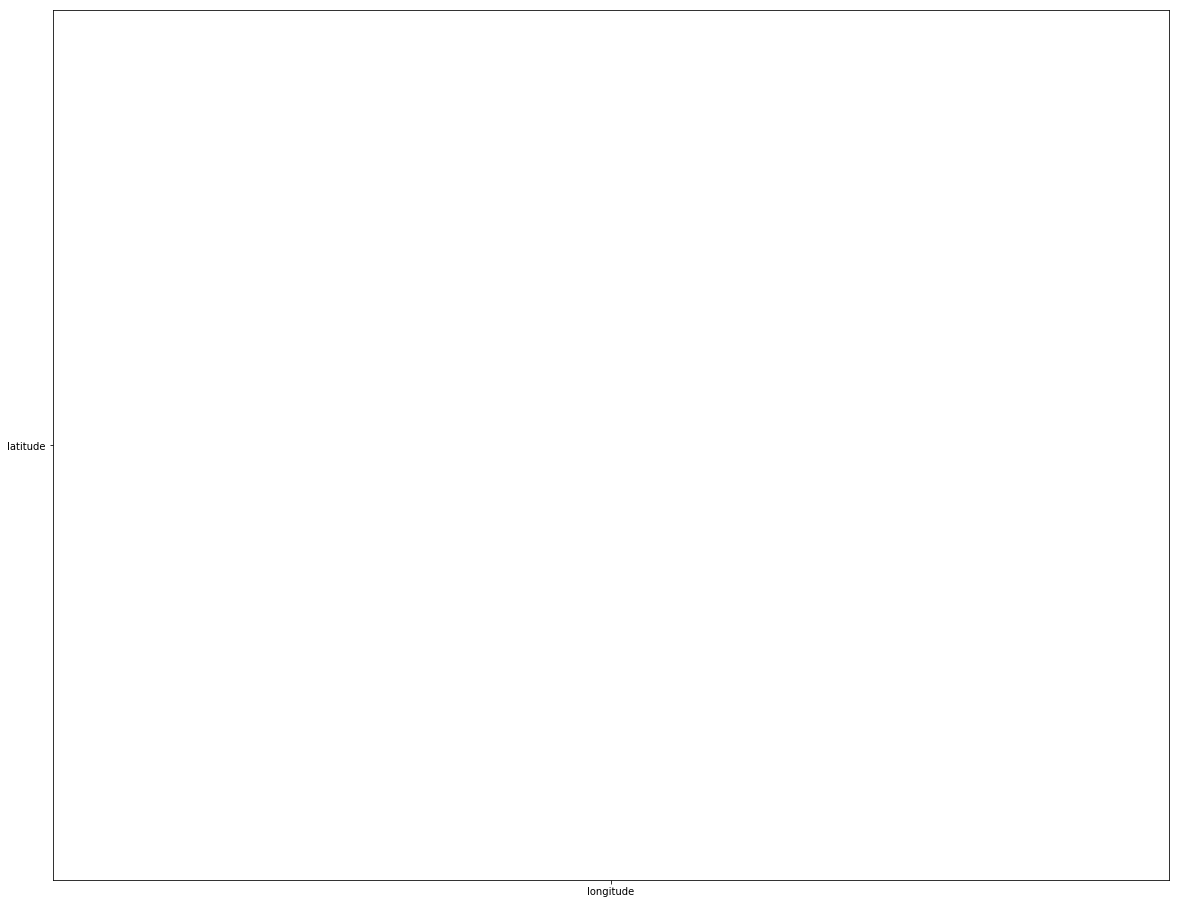

In [16]:
plt.figure(figsize=(20,16))
color_labels = df_500['lineName'].unique()
# List of RGB triplets
rgb_values = sns.color_palette("Set2", 8)

# Map label to RGB
color_map = dict(zip(color_labels, rgb_values))

plt.scatter(x="longitude", y="latitude", alpha=0.2,
           c=df_500['lineName'].map(color_map))
plt.show()

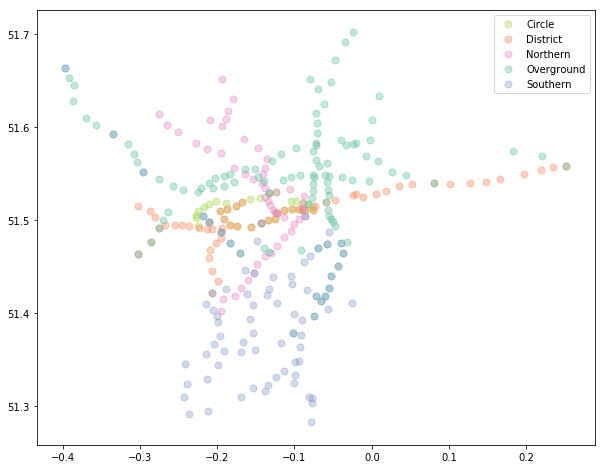

<Figure size 432x288 with 0 Axes>

In [19]:
plt.figure(figsize=(10,8))
for color, group in df_500.groupby(['lineName']):
    plt.scatter(group['longitude'], group['latitude'], s=50, c=[color_map[color]], alpha=0.4, label=color)

plt.legend()
plt.figure()
plt.show()